In [1]:
import numpy as np
from gwbench import network

/home/sreelakshmi/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## User Choices

#### choose the desired detectors

In [2]:
network_spec = ['aLIGO_H','aLIGO_L','aLIGO_V']

#### initialize the network with the desired detectors

In [3]:
net = network.Network(network_spec)

#### choose the desired waveform 

In [4]:
wf_model_name = 'tf2'

#### pass the chosen waveform to the network for initialization

In [5]:
net.set_wf_vars(wf_model_name=wf_model_name)

#### pick the desired frequency range

In [6]:
f = np.arange(5.,61.5,2**-4)
#print(f)
print(len(f))

904


#### set the injection parameters

In [19]:
inj_params = {
    'Mc':    30.9,
    'eta':   0.247,
    'chi1z': 0,
    'chi2z': 0,
    'DL':    475,
    'tc':    0,
    'phic':  0,
    'iota':  np.pi/4,
    'ra':    np.pi/4,
    'dec':   np.pi/4,
    'psi':   np.pi/4,
    'gmst0': 0
    }

#### assign with respect to which parameters to take derivatives

In [20]:
deriv_symbs_string = 'Mc eta DL tc phic iota ra dec psi'

#### assign which parameters to convert to cos or log versions

In [21]:
conv_cos = ('iota','dec')
conv_log = ('Mc')

#### choose whether to take Earth's rotation into account

In [22]:
use_rot = 0

#### pass all these variables to the network

In [23]:
net.set_net_vars(
    f=f, inj_params=inj_params,
    deriv_symbs_string=deriv_symbs_string,
    conv_cos=conv_cos, conv_log=conv_log,
    use_rot=use_rot
    )

## GW benchmarking

#### compute the WF polarizations

In [24]:
net.calc_wf_polarizations()
f0=net.hfc
print(len(f0))
#print(f0)

2023-10-12 13:47:51,641 - Network - INFO : Polarizations calculated.


904


#### compute the WF polarizations and their derivatives

In [25]:
net.calc_wf_polarizations_derivs_num()
f1=net.del_hfpc
print(len(f1))
#print(f1)

for key in f1.keys():
   print(key)
   


2023-10-12 13:47:52,421 - Network - INFO : Calculate numeric derivatives of polarizations.
2023-10-12 13:47:52,430 - Network - INFO : Polarizations calculated.
2023-10-12 13:47:52,748 - Network - INFO : Numeric derivatives of polarizations calculated.


12
del_log_Mc_hfp
del_log_Mc_hfc
del_eta_hfp
del_eta_hfc
del_DL_hfp
del_DL_hfc
del_tc_hfp
del_tc_hfc
del_phic_hfp
del_phic_hfc
del_cos_iota_hfp
del_cos_iota_hfc


#### setup antenna patterns, location phase factors, and PSDs

In [26]:
net.setup_ant_pat_lpf_psds()

2023-10-12 13:47:53,794 - Network - INFO : PSDs loaded.
2023-10-12 13:47:53,800 - Network - INFO : Antenna patterns and LPFs loaded.


#### compute the detector responses

In [27]:
net.calc_det_responses()

2023-10-12 13:47:54,429 - Network - INFO : Detector responses calculated.


#### compute the detector responses and their derivatives

In [28]:
net.calc_det_responses_derivs_num()

2023-10-12 13:47:55,174 - Network - INFO : Calculate numeric derivatives of detector responses.
2023-10-12 13:47:55,176 - Network - INFO :    aLIGO_H
2023-10-12 13:47:55,368 - Network - INFO :    aLIGO_L
2023-10-12 13:47:55,510 - Network - INFO :    aLIGO_V
2023-10-12 13:47:55,642 - Network - INFO : Numeric derivatives of detector responses calculated.


#### calculate the network and detector SNRs

In [29]:
net.calc_snrs()

2023-10-12 13:47:57,604 - Network - INFO : SNRs calculated.


#### calculate the network and detector Fisher matrices, condition numbers, covariance matrices, error estimates, and inversion errors

In [30]:
net.calc_errors()

2023-10-12 13:47:58,812 - Network - INFO : Calculate errors (Fisher & cov matrices).
2023-10-12 13:47:58,815 - Network - INFO :    aLIGO_H
2023-10-12 13:47:58,876 - Network - INFO :    aLIGO_L
2023-10-12 13:47:58,964 - Network - INFO :    aLIGO_V
2023-10-12 13:47:59,077 - Network - INFO : Errors calculated.


#### calculate the 90%-credible sky area (in deg)

In [31]:
net.calc_sky_area_90()

2023-10-12 13:48:01,908 - Network - INFO : Sky areas calculated.


In [32]:
f= net.detectors[0].f
h=net.detectors[0].hf
print(len(f))
#print(f)

824


In [33]:
f2=net.detectors[0].del_hf
print(len(f2))
#print(f2)
for key in f2.keys():
   print(key)
  

9
del_log_Mc_hf
del_eta_hf
del_DL_hf
del_tc_hf
del_phic_hf
del_cos_iota_hf
del_ra_hf
del_cos_dec_hf
del_psi_hf


In [34]:
f3=net.detectors[0].fisher
print(f3)

[[ 2.01382016e+04 -8.73612963e+03 -1.70760877e-02 -3.21174942e+04
   2.32152586e+02  5.93020732e+01 -2.09032148e+03  4.08591008e+03
   4.76556399e+02]
 [-8.73612963e+03  4.29573539e+04  6.44738487e-06 -1.37393841e+05
   3.99270764e+02  8.40616576e+01 -2.64766597e+03  6.33194063e+03
   8.21081882e+02]
 [-1.70760877e-02  6.44738487e-06  4.31681276e-05 -6.52698544e-05
   3.03257303e-07 -2.63377295e-02  1.86950936e-01  3.64284653e-01
   2.15912417e-03]
 [-3.21174942e+04 -1.37393841e+05 -6.52698544e-05  6.45336843e+05
  -2.37989041e+03 -5.01057014e+02  1.75147530e+04 -3.97354075e+04
  -4.89413389e+03]
 [ 2.32152586e+02  3.99270764e+02  3.03257303e-07 -2.37989041e+03
   9.73959601e+00  2.05055326e+00 -7.42850241e+01  1.65613416e+02
   2.00290253e+01]
 [ 5.93020732e+01  8.40616576e+01 -2.63377295e-02 -5.01057014e+02
   2.05055326e+00  1.65009691e+01 -1.29704029e+02 -1.87386752e+02
   2.89991995e+00]
 [-2.09032148e+03 -2.64766597e+03  1.86950936e-01  1.75147530e+04
  -7.42850241e+01 -1.2970402

In [35]:
f4=net.detectors[0].cov
print(f4)

[[ 3.84392403e-03  6.44062599e-03  3.19809971e+01 -5.76869428e-01
  -1.54645233e+02 -2.44771393e+02 -4.83683586e+01  8.41063213e+00
  -2.17394958e+02]
 [ 6.44062599e-03  1.13722626e-02  9.68571548e+01 -9.44627762e-01
  -2.05480499e+02 -4.15232666e+02 -7.99059677e+01  1.32017088e+01
  -3.75634308e+02]
 [ 3.19809971e+01  9.68571548e+01  2.26178957e+11  1.58731020e+07
  -3.42109888e+08  2.78855086e+10  2.42932787e+09  7.29702848e+08
   2.17392102e+09]
 [-5.76869428e-01 -9.44627762e-01  1.58731020e+07  3.02559805e+04
   1.59888112e+06  1.44634590e+07  2.60053350e+06 -3.74193750e+05
   1.40759760e+07]
 [-1.54645233e+02 -2.05480499e+02 -3.42109888e+08  1.59888112e+06
   3.30134528e+09  1.06290450e+06  1.03481040e+08 -4.92925200e+07
  -6.24098048e+08]
 [-2.44771393e+02 -4.15232666e+02  2.78855086e+10  1.44634590e+07
   1.06290450e+06  2.79097098e+10  2.36361677e+09  7.95330176e+08
   1.05072237e+09]
 [-4.83683586e+01 -7.99059677e+01  2.42932787e+09  2.60053350e+06
   1.03481040e+08  2.3636167

In [36]:
for i in np.arange(0,8):
   err= np.sqrt(f4[i,i])
   print(err)


0.061999388
0.10664081
475582.75
173.94246
57457.336
167062.0
16832.414
7060.0044


In [25]:
u,w=np.linalg.eigh(f4)
print(u,w)

[-1.0583433e+00  1.4717723e-04  8.6458353e-03  1.6986238e-02
  2.4284267e+00  3.2455744e+09  8.9609083e+09  2.4291873e+10
  2.3008625e+11] [[ 2.34889681e-03  8.66450012e-01 -2.67115653e-01  4.21750128e-01
   5.90582704e-03 -5.41530127e-08  2.10477609e-08  1.07379012e-08
   1.90887497e-11]
 [ 4.59742919e-03 -4.99248981e-01 -4.57119644e-01  7.35963464e-01
   1.13440016e-02 -7.46180788e-08  3.71260995e-08  1.84631492e-08
  -1.50427323e-10]
 [ 1.17660384e-04 -4.34330083e-08 -1.01916912e-05 -6.29033821e-06
  -5.24242605e-05  1.31138822e-03  3.35596572e-03  1.37740284e-01
  -9.90461826e-01]
 [ 1.30940989e-01  3.82439443e-03  8.40273201e-01  5.22774756e-01
   5.90254143e-02  9.33141389e-04 -1.45921810e-03 -5.35296625e-04
  -7.76864763e-05]
 [-1.15098543e-02  1.70423300e-05 -1.75828766e-03 -1.83735648e-03
   5.37705906e-02  9.92765486e-01  1.06691033e-01 -1.10897014e-03
   1.51753344e-03]
 [-7.42101148e-02  3.01389609e-05  5.84854931e-03  3.44920275e-03
   4.33037169e-02 -1.03272842e-02  5.812

In [26]:
import matplotlib.pyplot as plt
cov_matrix = f4


eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
max_eigenvlue= eigenvalues[0]
max_eigenvector = eigenvectors[:,0]
min_eigenvalue = eigenvalues[8]
min_eigenvector= eigenvectors[:,-1]
print(min_eigenvector)
chisquare_val = 2.4477


#print(eigenvectors)



[[ 2.34889681e-03]
 [ 4.59742919e-03]
 [ 1.17660384e-04]
 [ 1.30940989e-01]
 [-1.15098543e-02]
 [-7.42101148e-02]
 [ 6.24119341e-01]
 [ 7.66385615e-01]
 [-1.77862048e-02]]


## Print results

#### print the contents of the detector objects (inside the network)

In [27]:
#net.print_detectors()

#### print the contents of the network objects

In [28]:
#net.print_network()

In [29]:
mean = [30.9, 0.247, 475, 0,0 , np.pi/4, np.pi/4, np.pi/4, np.pi/4]


In [30]:
import numpy as np
xy_cov = cov_matrix[np.ix_([0, 1], [0, 1])]
print(xy_cov)
x,y=np.linalg.eigh(xy_cov)
print(x)

[[0.00384392 0.00644063]
 [0.00644063 0.01137226]]
[0.00014816 0.01506803]


In [31]:
import numpy as np
n_params = len(mean)

for i in range (n_params):
    for j in range(i):
        #print(i,j)
        
       xy_cov = cov_matrix[np.ix_([i, j], [i, j])]
       eigenvalues,v= np.linalg.eigh(xy_cov)
       #print('eigenvalues=',eigenvalues)
       print('radii= ',np.sqrt(eigenvalues)*2.4477)
       


radii=  [0.02979346 0.30045983]
radii=  [1.5175581e-01 1.1640839e+06]
radii=  [2.6102424e-01 1.1640839e+06]
radii=  [1.5153864e-01 4.2575897e+02]
radii=  [2.6068604e-01 4.2575897e+02]
radii=  [4.1784769e+02 1.1640839e+06]
radii=  [1.5161283e-01 1.4063833e+05]
radii=  [2.6087788e-01 1.4063833e+05]
radii=  [ 140627.14 1164085.2 ]
radii=  [   420.27527 140638.33   ]
radii=  [1.5171352e-01 4.0891766e+05]
radii=  [2.6095381e-01 4.0891766e+05]
radii=  [ 379688.84 1173942.8 ]
radii=  [3.6927573e+02 4.0891769e+05]
radii=  [140638.33 408917.66]
radii=  [1.5159282e-01 4.1200699e+04]
radii=  [2.6076597e-01 4.1200699e+04]
radii=  [  39255.47 1164151.1 ]
radii=  [  195.61026 41202.438  ]
radii=  [ 40942.215 140713.8  ]
radii=  [ 22241.273 410385.75 ]
radii=  [1.5172789e-01 1.7280773e+04]
radii=  [2.6098460e-01 1.7280773e+04]
radii=  [  16867.652 1164090.   ]
radii=  [  405.5007 17281.26  ]
radii=  [ 17150.773 140654.23 ]
radii=  [ 12755.647 409083.8  ]
radii=  [16988.08  41322.242]
radii=  [1.51650

In [32]:
from scipy.stats import chi2
confidence_level = 0.95
chi_squared_val = chi2.ppf(confidence_level,2)
print(chi_squared_val)

5.991464547107979


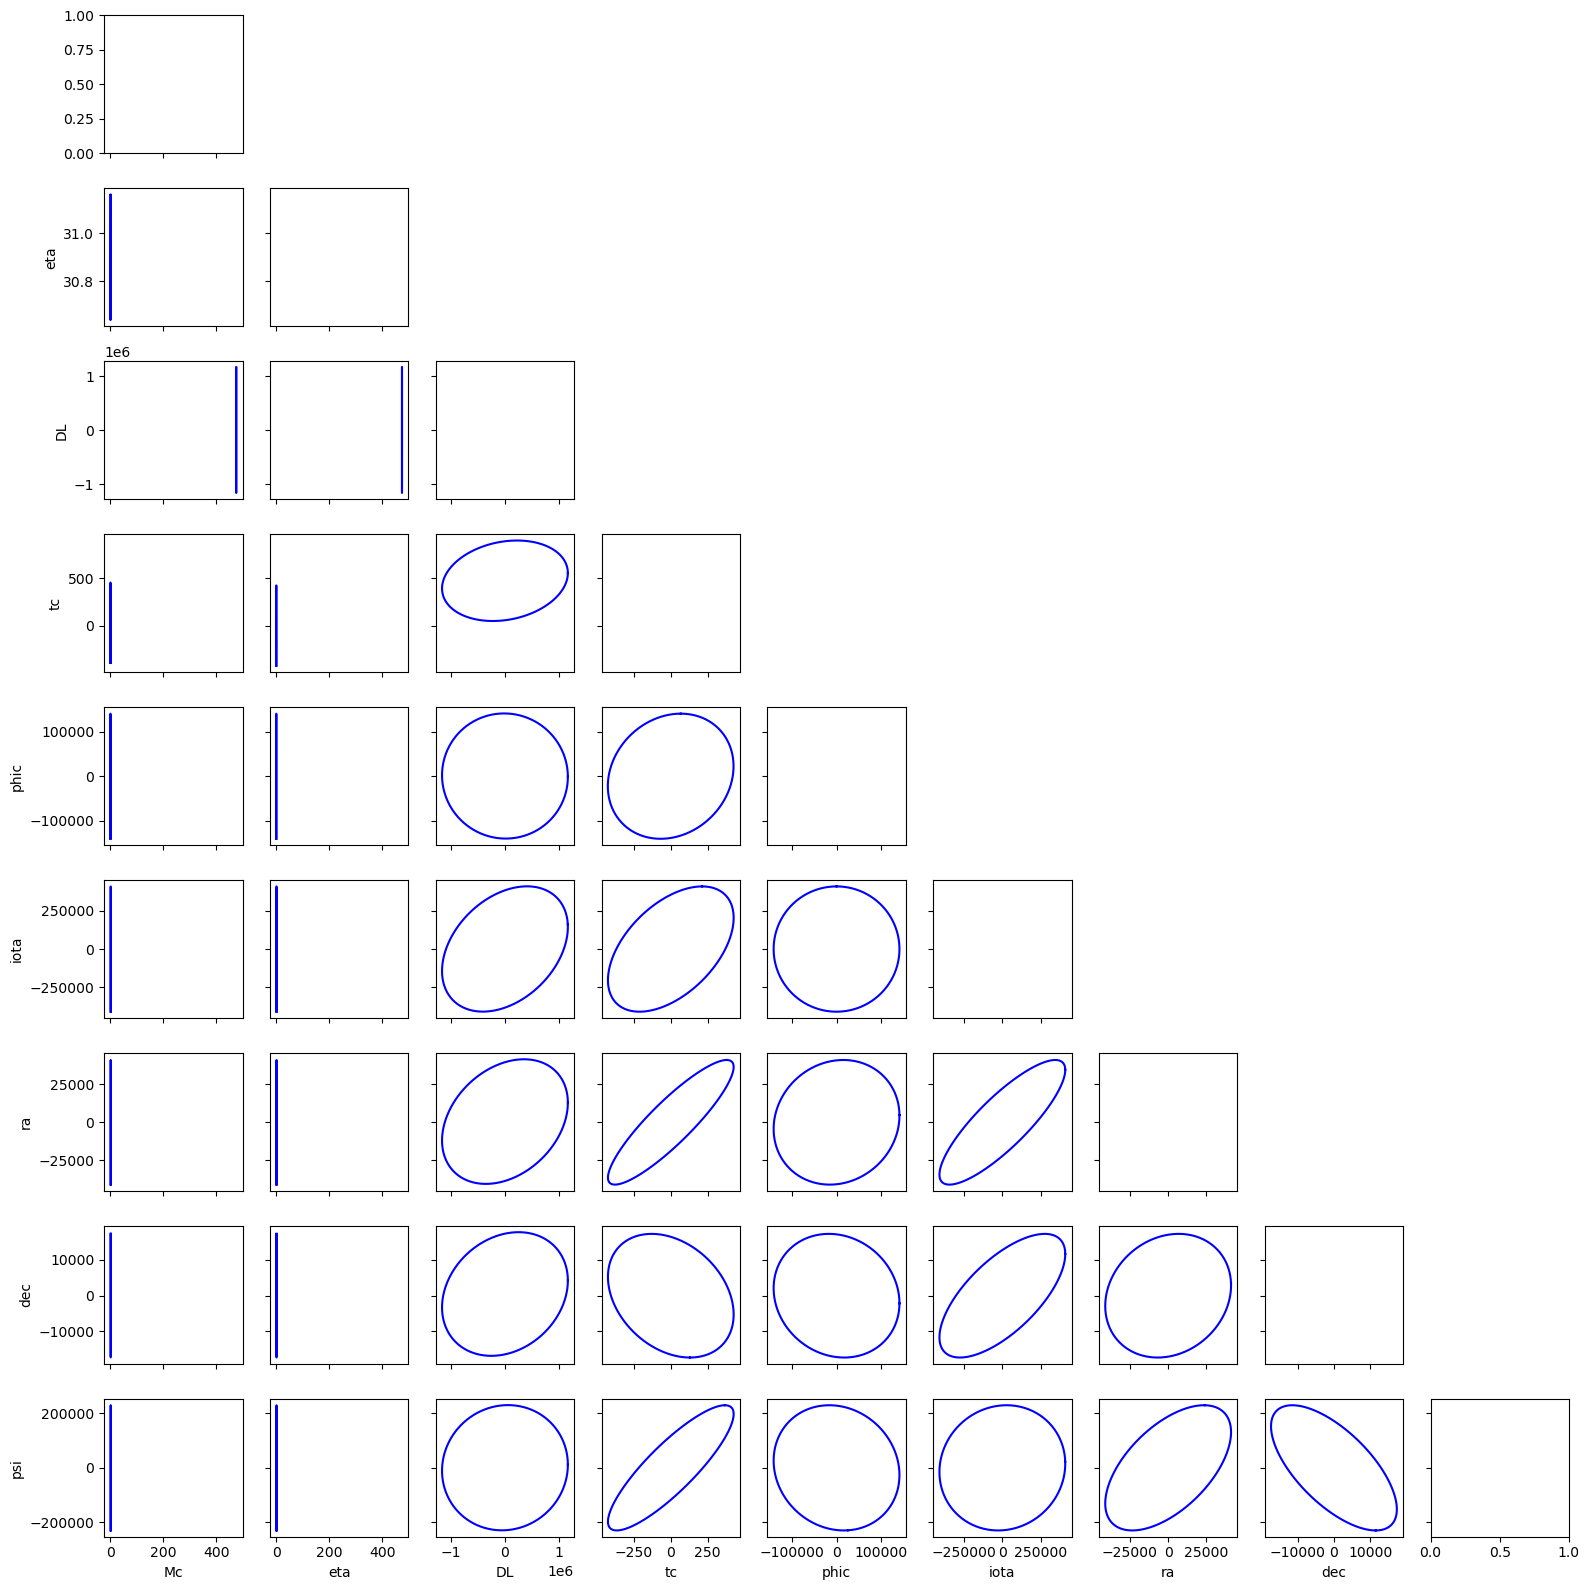

In [33]:
import numpy as np
import matplotlib.pyplot as plt

parameters= ['Mc', 'eta', 'DL' ,'tc', 'phic', 'iota', 'ra' ,'dec', 'psi']
mean = [30.9, 0.247, 475, 0, 0, np.pi/4, np.pi/4, np.pi/4, np.pi/4]


def plot_corner_ellipses(cov_matrix, means, confidence_level=0.95):
    z = np.sqrt(chi_squared_val )
    n_params = len(means)
    #print(z)
    fig, axes = plt.subplots(n_params, n_params, figsize=(16,16), sharex='col', sharey='row')
    
    
    
    for i in range(n_params):
        for j in range(i):  
            ax = axes[i, j]
            xy_mean = [means[i], means[j]]
            xy_cov = cov_matrix[np.ix_([i, j], [i, j])]
            eigenvalues,v= np.linalg.eigh(xy_cov)
            semi_major_axis = z * np.sqrt(eigenvalues[1])
            semi_minor_axis = z * np.sqrt(eigenvalues[0])
            rotation_angle = 0.5 * np.arctan2(2 * xy_cov[0, 1], (xy_cov[1, 1] - xy_cov[0, 0]))

            theta = np.linspace(0, 2 * np.pi, 100)
            x = xy_mean[0] + semi_major_axis * np.cos(theta) * np.cos(rotation_angle) - semi_minor_axis * np.sin(theta) * np.sin(rotation_angle)
            y = xy_mean[1] + semi_major_axis * np.cos(theta) * np.sin(rotation_angle) + semi_minor_axis * np.sin(theta) * np.cos(rotation_angle)

            ax.plot(x, y, color='b')

            # Set the axis labels for the plot
            if i == n_params - 1:
                ax.set_xlabel(parameters[j])
            if j == 0:
                ax.set_ylabel(parameters[i])

    
    for i in range(n_params):
        for j in range(n_params):
            if i < j:
                axes[i, j].remove()

    plt.tight_layout()
    plt.show()

cov_matrix = f4
mean = [30.9, 0.247, 475, 0, 0, np.pi/4, np.pi/4, np.pi/4, np.pi/4]
plot_corner_ellipses(cov_matrix, mean)

Text(0.5, 1.0, 'Error ellipse')

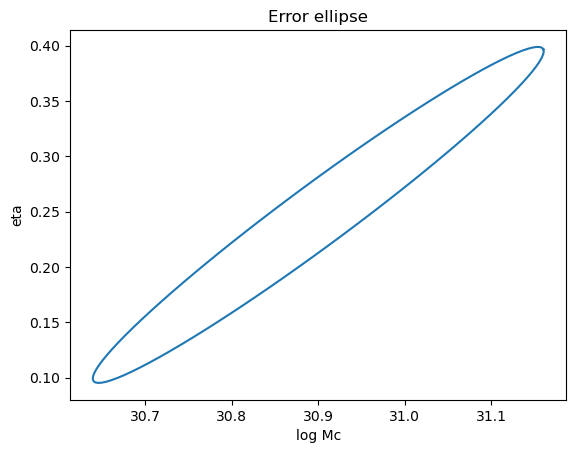

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
chi_squared_val = chi2.ppf(confidence_level,2)
#print(chi_squared_val)
z = np.sqrt(chi_squared_val )
parameters= ['Mc', 'eta', 'DL' ,'tc', 'phic', 'iota', 'ra' ,'dec', 'psi']
mean = [30.9, 0.247, 475, 0, 0, np.pi/4, np.pi/4, np.pi/4, np.pi/4]
xy_cov = cov_matrix[np.ix_([0, 1], [0, 1])]
eigenvalues,v= np.linalg.eigh(xy_cov)
semi_major_axis = z * np.sqrt(eigenvalues[1])
semi_minor_axis = z * np.sqrt(eigenvalues[0])
rotation_angle = 0.5 * np.arctan2(2 * xy_cov[0, 1], (xy_cov[1, 1] - xy_cov[0, 0]))
theta = np.linspace(0, 2 * np.pi, 100)
x = mean[0] + semi_major_axis * np.cos(theta) * np.cos(rotation_angle) - semi_minor_axis * np.sin(theta) * np.sin(rotation_angle)
y = mean[1] + semi_major_axis * np.cos(theta) * np.sin(rotation_angle) + semi_minor_axis * np.sin(theta) * np.cos(rotation_angle)
plt.plot(x,y)
plt.xlabel('log Mc')
plt.ylabel('eta')
plt.title('Error ellipse')

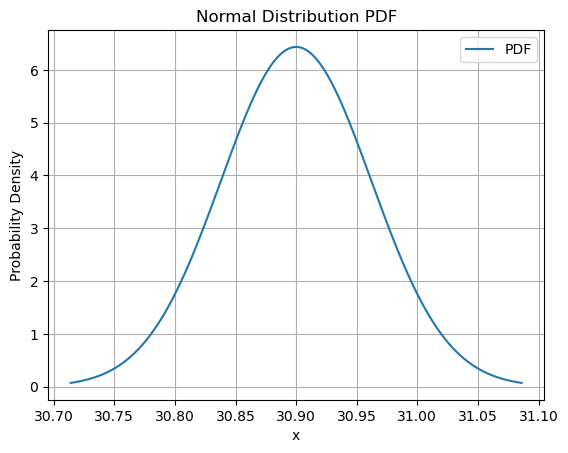

In [35]:
import numpy as np
import matplotlib.pyplot as plt


mean = 30.9
variance = 0.00384392 


x = np.linspace(mean - 3*np.sqrt(variance), mean + 3*np.sqrt(variance), 1000)


pdf = (1 / np.sqrt(2*np.pi*variance)) * np.exp(-(x - mean)**2 / (2*variance))


plt.plot(x, pdf, label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()